# DETE and TAFE employees job leaving reasons - Analysis
<font size='4'>The reasons of quitting and the particular distributions will be analyzed in this work. The datasets present exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.</font>

In [1]:
#importing neccessary libraries
import numpy as np
import pandas as pd
import pprint

In [2]:
#reading in the datasets
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [9]:
#showing the first few rows of DETE dataset
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [4]:
dete_survey.shape

(822, 56)

In [5]:
#counting null values in the datasets
null_values_dete = dete_survey.isnull().sum()
null_values_tafe = tafe_survey.isnull().sum()

In [6]:
#counting the percentages of nulls to the whole dataset
percentage_null_dete = round(null_values_dete/(dete_survey.notnull().sum()+null_values_dete)*100, 2)
percentage_null_tafe = round(null_values_tafe/(tafe_survey.notnull().sum()+null_values_tafe)*100, 2)

In [7]:
#builiding a table to show null values
pd.concat([null_values_dete, percentage_null_dete], axis=1, join='inner', keys=['number_null', 'percentage_of_all'])


,number_null,percentage_of_all
ID,0,0.00
SeparationType,0,0.00
Cease Date,0,0.00
DETE Start Date,0,0.00
Role Start Date,0,0.00
Position,5,0.61
Classification,367,44.65
Region,0,0.00
Business Unit,696,84.67
Employment Status,5,0.61


<font size='3'>As we can observe, DETE dataframe has 56 columns and 822 rows. There are some columns with a lot of missing values (up to 99% of total, mostly between 1-10%), however the ones that are the most useful seem to be more or less clean.</font>

In [8]:
#showing first rows of the TAFE dataset
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [9]:
tafe_survey.shape

(702, 72)

In [10]:
#builiding a table to show null values
pd.concat([null_values_tafe, percentage_null_tafe], axis=1, join='inner', keys=['number_null', 'percentage_of_all'])


,number_null,percentage_of_all
Record ID,0,0.00
Institute,0,0.00
WorkArea,0,0.00
CESSATION YEAR,7,1.00
Reason for ceasing employment,1,0.14
...,...,...
CurrentAge. Current Age,106,15.10
Employment Type. Employment Type,106,15.10
Classification. Classification,106,15.10
LengthofServiceOverall. Overall Length of Service at Institute (in years),106,15.10


<p>In TAFE dataframe there are 72 rows and 702 columns. Here, there are a lot more missing values (most of the columns have more than 15% of them), some of the columns valuable to the analysis are among them.<p>

In [11]:
#reading in dete data again, with null values set as "not stated"
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

In [15]:
#dropping the columns that are unneccessary
col_to_drop1 = dete_survey.columns[28:49]
dete_survey_updated = dete_survey.drop(col_to_drop1, axis=1)
dete_survey_updated.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')

In [16]:
#dropping the columns that are unneccessary
col_to_drop2 = tafe_survey.columns[17:66]
tafe_survey_updated = tafe_survey.drop(col_to_drop2, axis=1)
tafe_survey_updated.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender. What is your Gender?', 'CurrentAge. Current Age',
       'Employment Type. Employment Type', 'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='ob

<font size='3'>Above, I've read the dete survey dataset again with 'Non Stated' cells recognised as NaN values. Then, I've dropped the columns that will not be needed during the analysis.</font>

In [17]:
#changing whitespaces to underscores and making characters lowercase in column names in DETE
dete_survey_updated.columns = (dete_survey_updated.columns
                      .str.strip()
                      .str.replace(' ', '_')
                      .str.lower()
                      )

In [18]:
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [19]:
#creating a dictionary with new names for some columns in TAFE
new_names = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date', 'Gender. What is your Gender?': 'gender', 'Reason for ceasing employment': 'separationtype', 'Current Age': 'age', 'Employment Type. Employment Type': 'employment_status', 'Classification. Classification': 'position', 'LenghtofServiceOverall. Overall Lenght of Service at Institute (in years)':'institute_service', 'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role', 'CurrentAge. Current Age': 'age'}
#updating column names with new ones
tafe_survey_updated = tafe_survey_updated.rename(columns=new_names)

In [20]:
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [21]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,LengthofServiceOverall. Overall Length of Service at Institute (in years),role
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


<font size='3'>I renamed and unified the columns in both dataframes so they match each other and it is easier to acess particular columns.</font>

In [22]:
#displaying counts of all separation reasons
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [23]:
#displaying counts of all separation reasons
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [25]:
dete_resignations = dete_survey_updated[(dete_survey_updated['separationtype']=='Resignation-Other reasons')|(dete_survey_updated['separationtype']=='Resignation-Other employer')|(dete_survey_updated['separationtype']=='Resignation-Move overseas/interstate')].copy()

In [26]:
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype']=='Resignation'].copy()

<p>I've selected only rows with separationtype column equal to resignation and all its offshoots, beacause the analysis will focus on those values.</p>

In [27]:
dete_resignations.drop(labels='id', axis=1, inplace=True)
dete_resignations.reset_index(drop=True, inplace=True)

In [28]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
2010         1
09/2010      1
07/2006      1
Name: cease_date, dtype: int64

In [29]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split(n=1, pat='/').str[-1]

In [30]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype(float)

In [31]:
dete_resignations['dete_start_date'].value_counts().sort_index(ascending=True)

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

In [32]:
tafe_resignations['cease_date'].value_counts().sort_index(ascending=True)

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


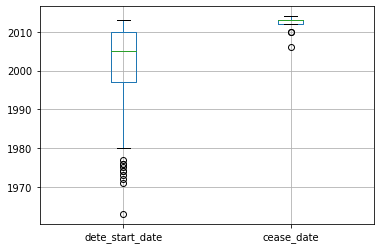

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
dete_resignations.boxplot(column=['dete_start_date', 'cease_date'])

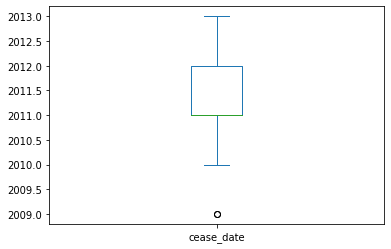

In [34]:
tafe_resignations['cease_date'].plot(kind='box')

<p>I've unified the values in 'cease_date' column in dete_resignations dataframe. After further analysis there seem to be no outstanding values in 'cease_date', 'dete_start_date' and 'cease_date' columns.</p>

In [35]:
dete_resignations.head()

,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
1,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
2,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
3,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
4,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,False,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


In [36]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

<p>Above, I've created a new column presenting the number of years each resigning employee worked in the institue. That way it is easier to find out the reasons for resignations among short-period and long-period workers.</p>


In [37]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [38]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [39]:
def update_vals(val):
    if pd.isnull(val) == True:
        return np.nan
    if val == '-':
        return False
    else:
        return True
    


In [40]:
tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']]

,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction
3,-,-
4,-,-
5,-,-
6,-,-
7,-,-
...,...,...
696,-,-
697,-,-
698,-,-
699,-,-


In [41]:
tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals)

In [42]:
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].any(axis=1, skipna=False)

In [43]:
tafe_resignations['dissatisfied'].value_counts()

False    241
True      99
Name: dissatisfied, dtype: int64

In [44]:
dete_resignations[['job_dissatisfaction', 'dissatisfaction_with_the_department', 'physical_work_environment', 'lack_of_recognition', 'lack_of_job_security', 'work_location', 'employment_conditions', 'work_life_balance', 'workload']]

,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,work_life_balance,workload
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False
3,True,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
306,False,False,False,False,False,False,False,False,False
307,False,False,False,False,False,False,False,False,False
308,False,False,False,False,False,False,False,False,False
309,False,False,False,False,False,False,False,True,False


In [45]:
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction', 'dissatisfaction_with_the_department', 'physical_work_environment', 'lack_of_recognition', 'lack_of_job_security', 'work_location', 'employment_conditions', 'work_life_balance', 'workload']].any(axis=1, skipna=False)

In [46]:
dete_resignations['dissatisfied'].value_counts()

False    162
True     149
Name: dissatisfied, dtype: int64

In [47]:
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()
tafe_resignations_up['institute_service'] = tafe_resignations_up['LengthofServiceOverall. Overall Length of Service at Institute (in years)']

<p>Here, I've created 'disatisfied' column in both dataframes containing bool values, where True is for employees who left the job beacause they where dissatisfied with it.</p>

In [48]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [49]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up], axis=0,  ignore_index=True)

<p>I've concatenaded the two dataframes, so the final analysis is easier to conduct.</p>

In [50]:
combined['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
10.0                   6
14.0                   6
12.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
32.0                   3
39.0                   3
19.0                   3
21.0                   3
36.0                   2
25.0                   2
30.0                   2
26.0                   2
28.0                   2
49.0                   1


In [51]:
import re
combined['institute_service'] = (combined['institute_service']
 .astype(str)
 .str.split(pat='-')
 .str[0]
 .str.split(pat=' ')
 .str[0]
 .str.replace('Less', '0')
 .str.replace('More', '12')
 .astype(float)
)

In [52]:
def cats(val):
    if pd.isnull(val) == True:
        return np.nan
    if val <= 3:
        return 'New'
    if (val > 3) and (val < 7):
        return 'Experienced'
    if (val >= 7) and (val < 11):
        return 'Established'
    if val >= 11:
        return 'Veteran'
    

In [53]:
combined['service_cat'] = combined['institute_service'].apply(cats)

In [54]:
combined['service_cat'].unique()

array(['Established', 'Veteran', 'New', 'Experienced', nan], dtype=object)

In [55]:
combined['service_cat'].fillna(True)

0      Established
1          Veteran
2              New
3          Veteran
4              New
          ...     
646    Experienced
647            New
648           True
649    Experienced
650            New
Name: service_cat, Length: 651, dtype: object

<p>Above, I've converted the data in institute_service column into categories, so it can be easily analyzed.</p>

In [56]:
combined['dissatisfied'].value_counts(dropna=False)

False    403
True     248
Name: dissatisfied, dtype: int64

In [57]:
combined['dissatisfied'].fillna(False)

0      False
1       True
2      False
3       True
4      False
       ...  
646    False
647    False
648    False
649    False
650    False
Name: dissatisfied, Length: 651, dtype: bool

In [58]:
def bool_to_int(val):
    if val == True:
        return 1
    if val == False:
        return 0


In [59]:
combined['dissatisfied_int'] = combined['dissatisfied'].apply(bool_to_int)

In [60]:
pivot = combined.pivot_table('dissatisfied_int', 'service_cat')

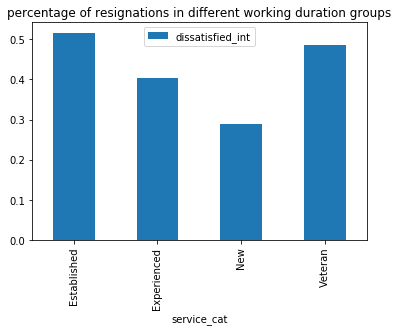

In [61]:
pivot.plot(kind='bar', title='percentage of resignations in different working duration groups')

<p>As we can observe above, the most resignations happen in Established worker groups, whereas the least resignations happen in New group.</p>

In [62]:
combined['dissatisfied'].value_counts(dropna=False)

False    403
True     248
Name: dissatisfied, dtype: int64

In [63]:
combined['age'].value_counts(dropna=False)

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
36  40           32
31  35           32
26  30           32
21-25            29
31-35            29
56 or older      29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

In [64]:
mask = combined['age'].isnull()
combined.loc[mask==True, 'service_cat'].value_counts(dropna=False)

NaN        53
Veteran     1
New         1
Name: service_cat, dtype: int64

<p>In 'age' column there are over 50 null values, but after further analysis those records seem to be somewhat empty in all of the other columns, so the best decision is probably to drop them.</p>

In [65]:
combined = combined[pd.notnull(combined['age'])]

In [66]:
agg = combined.groupby('age')['dissatisfied_int']

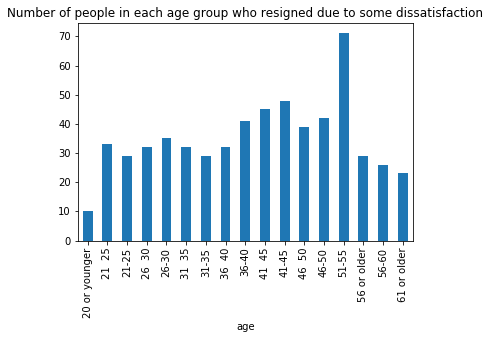

In [67]:
agg.describe()['count'].plot(kind='bar', title='Number of people in each age group who resigned due to some dissatisfaction')

<p>As we can see, the most resignations happens among workers who are 51 - 55 years old.</p>

In [68]:
dete_resignations.columns

Index(['separationtype', 'cease_date', 'dete_start_date', 'role_start_date',
       'position', 'classification', 'region', 'business_unit',
       'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb', 'institute_service', 'dissatisfied'],
      dtype='object')

In [69]:
tafe_resignations.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'role', 'dissatisfied'],
      dtype='object')

In [70]:
dete_num = dete_resignations[['job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions', 'dissatisfied']].any(axis=1, skipna=False) == True

In [71]:
dete_num.value_counts()

False    162
True     149
dtype: int64

In [72]:
tafe_num = tafe_resignations[['Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict']].any(axis=1, skipna=False)

In [73]:
tafe_num.value_counts()

True    340
dtype: int64

<p>We can observe above that the employees of DETE were more likely to resign due to some kind of dissatisfaction than the workers of TAFE</p>